# 田中さんの卒研：犬・猫画像の分類
データセット：The Oxford-III Pet Dataset  
https://www.robots.ox.ac.uk/~vgg/data/pets/




In [1]:
import pandas as pd

'''
Image : ファイル名の前部分
CLASS-ID : Dog / Cat を合わせた場合のクラス番号
SPECIES : Cat の場合は 1, Dog の場合は 2 (Imageの先頭文字が大文字ならば Cat / 小文字ならば Dog)
BREED-ID : Dog / Cat それぞれに絞った場合の種別ID。Cat の場合，1〜12。Dog の場合，1〜25。
'''
image_list = "Oxford/annotations/list.txt"
df = pd.read_csv(image_list, skiprows=[0,1,2,3,4,5], delimiter=' ', header=None)
df.columns = ['Image', 'CLASS-ID', 'SPECIES', 'BREED-ID']
df

,Image,CLASS-ID,SPECIES,BREED-ID
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [2]:
def make_class_name(x):
    x = x.split('_')[:-1]
    x = '_'.join(x)
    return x
df['class_name'] = df['Image'].apply(make_class_name)

In [3]:
df

,Image,CLASS-ID,SPECIES,BREED-ID,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,yorkshire_terrier
7345,yorkshire_terrier_97,37,2,25,yorkshire_terrier
7346,yorkshire_terrier_98,37,2,25,yorkshire_terrier
7347,yorkshire_terrier_99,37,2,25,yorkshire_terrier


In [4]:
# confusion matrix の際に利用する
class_names = df['class_name'].unique().tolist()
class_names

['Abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'boxer',
 'British_Shorthair',
 'chihuahua',
 'Egyptian_Mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'Maine_Coon',
 'miniature_pinscher',
 'newfoundland',
 'Persian',
 'pomeranian',
 'pug',
 'Ragdoll',
 'Russian_Blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'Siamese',
 'Sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [5]:
# 画像を１枚，表示してみる
from PIL import Image

image_parent_dir = "Oxford/images/"
path = image_parent_dir + df['Image'].iloc[0] + ".jpg"

im = Image.open(path)
print("Format:", im.format)
print("Mode:", im.mode)
print("Size:", im.size)

im.show()

Format: JPEG
Mode: RGB
Size: (394, 500)


In [3]:
# 全画像サイズのチェック → 確かにバラバラ
from PIL import Image

image_parent_dir = "Oxford/images/"

image_sizes = list()
for idx in range(df.shape[0]):
    path = image_parent_dir + df['Image'].iloc[idx] + ".jpg"

    im = Image.open(path)
    image_sizes.append(im.size)
    im.close()
    
print(set(image_sizes))

{(346, 500), (500, 319), (400, 291), (202, 300), (206, 300), (380, 500), (331, 500), (500, 293), (300, 202), (300, 279), (356, 500), (480, 360), (307, 500), (1280, 800), (500, 451), (300, 224), (478, 500), (324, 306), (500, 340), (400, 328), (299, 448), (500, 489), (450, 483), (184, 300), (500, 370), (230, 240), (500, 407), (200, 172), (500, 280), (400, 253), (500, 445), (400, 417), (322, 480), (311, 320), (500, 262), (400, 282), (405, 402), (600, 382), (500, 300), (379, 500), (600, 901), (277, 200), (343, 500), (254, 380), (300, 223), (300, 292), (294, 500), (500, 458), (500, 339), (248, 300), (319, 500), (225, 225), (498, 500), (449, 500), (300, 245), (500, 496), (467, 350), (399, 428), (500, 377), (474, 500), (425, 500), (288, 500), (473, 568), (413, 500), (288, 216), (500, 414), (373, 451), (500, 359), (389, 500), (412, 480), (400, 244), (500, 388), (210, 500), (250, 175), (600, 424), (600, 561), (500, 418), (381, 500), (500, 299), (357, 500), (901, 559), (150, 200), (600, 363), (5

In [4]:
# 全画像のモードをチェック → RGBA が混ざっている
from PIL import Image

image_parent_dir = "Oxford/images/"

modes = list()
for idx in range(df.shape[0]):
    path = image_parent_dir + df['Image'].iloc[idx] + ".jpg"

    im = Image.open(path)
    modes.append(im.mode)
    im.close()
    
import collections
collections.Counter(modes)

Counter({'RGB': 7346, 'RGBA': 3})

In [5]:
df.shape

(7349, 4)

In [6]:
image_parent_dir = "Oxford/images/"

# 画像パス名の一覧
X = [image_parent_dir + image_name + ".jpg" for image_name in df['Image'].tolist()]

# クラス（種別）の一覧
# 1 を引く理由：PyTorch による分類へ向けて，クラス番号を 0〜36 とするため
y = df['CLASS-ID'].values - 1 # Dog / Cat を問わず，全種の分類を試みる

In [7]:
# 学習／テストへのデータセット分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Dataset クラスの定義

import numpy as np
from PIL import Image
from pathlib import Path
import torch
# import torch.utils.data as data
from torchvision import transforms

# Transformer の定義
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    # transforms.Grayscale(num_output_channels=3), # ResNet 等に喰わせるため，あえて３チャネル
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Dataset : データソースから1個ずつデータを取り出すクラス
# 実装が必要なメソッドは__getitem__と__len__の2つ
# https://ohke.hateblo.jp/entry/2019/12/28/230000

# (メモ) このデータセットで transform=None はあり得ない！！
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, labels, transform=None): #, input_size):
        super().__init__()
        
        self.transform = transform
        self.image_paths = image_paths
        self.labels = labels
        self.len = len(self.image_paths)
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]
        
        # 入力
        image = Image.open(image_path)
        
        # covert RGBA to RGB
        # Oxford-III Pet Dataset に少数ながら 'RGBA' が含まれるため，
        # これを RGB へ変換する
        if image.mode == 'RGBA':
            image = image.convert('RGB')
        
        '''
        if self.transform:
            image = self.transform(image_array)
        else:
            image = torch.Tensor(np.transpose(image_array, (2, 0, 1)))/255  # for 0~1 scaling
        '''
        if self.transform:
            image = self.transform(image)
        else:
            image = np.asarray(image)
            image = torch.from_numpy(image)
                
        return image, label

train_dataset = MyDataset(X_train, y_train, transform=transform) #, (224, 224))
test_dataset = MyDataset(X_test, y_test, transform=transform) #, (224, 224))

# 動作チェック
image, label = train_dataset[0]
print(image.size(), label)  # torch.Size([3, 256, 256]) 1
print(type(image))
print(type(label))

torch.Size([3, 224, 224]) 28
<class 'torch.Tensor'>
<class 'numpy.int64'>


In [9]:
# DataLoader の定義

BATCH_SIZE = 16

trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=4, drop_last=True
)

testloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=4, drop_last=True
)

# 動作チェック
images, labels = next(iter(trainloader))
print(images.size())  # torch.Size([16, 3, 224, 224])
print(labels.size())  # torch.Size([16])

torch.Size([16, 3, 224, 224])
torch.Size([16])


In [10]:
# モデル / optimizer / criterion の定義

import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models

# GPUあれば使う
def check_cuda():
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = torch.device(check_cuda()) # "cuda"

import sys
print("device: {}".format(device), file=sys.stderr)

num_classes = 37 # クラス数

# net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True) #ResNet
# net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet101', pretrained=True) #ResNet

# ResNet18
net = models.resnet18(pretrained=True)
num_features = net.fc.in_features
net.fc = torch.nn.Linear(num_features, num_classes)

# ResNet50
'''
net = models.resnet50(pretrained=True)
num_features = net.fc.in_features
net.fc = torch.nn.Linear(num_features, 3) # 3 : number of class (normal, pneumonia, COVID-19)
'''

# VGG16
'''
net = models.vgg16(pretrained=True)
num_features = net.classifier[6].in_features # in_features = 4096
net.classifier[6] = torch.nn.Linear(num_features, 3) # 3 : number of class (normal, pneumonia, COVID-19)
'''

# VGG19
'''
net = models.vgg19(pretrained=True)
num_features = net.classifier[6].in_features # in_features = 4096
net.classifier[6] = torch.nn.Linear(num_features, 3) # 3 : number of class (normal, pneumonia, COVID-19)
'''

# Inception v3
# aux_logits の扱いについて：
# https://discuss.pytorch.org/t/error-in-training-inception-v3/23933/7
'''
num_classes = 3 # 3 : number of class (normal, pneumonia, COVID-19)
net = models.inception_v3(pretrained=True, aux_logits=False)
#num_ftrs = net.AuxLogits.fc.in_features
#net.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
num_features = net.fc.in_features # in_features = 2048
net.fc = torch.nn.Linear(num_features, num_classes)
'''

# SqueezeNet 1.1
'''
num_classes = 3 # 3 : number of class
net = models.squeezenet1_1(pretrained=True)
net.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
net.num_classes = num_classes
'''

net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.005)

print(net)

device: cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
# 学習
# https://qiita.com/mathlive/items/8e1f9a8467fff8dfd03c

EPOCH = 30

train_loss_value=[]      #trainingのlossを保持するlist
train_acc_value=[]       #trainingのaccuracyを保持するlist
test_loss_value=[]       #tes%MCEPASTEBIN%tのlossを保持するlist
test_acc_value=[]        #testのaccuracyを保持するlist 

for epoch in range(EPOCH):
    print('epoch', epoch+1)    #epoch数の出力

    # 学習
    net.train() # 学習モード
    for (inputs, labels) in trainloader:
        # print("inputs", inputs.shape)
        # print("labels", labels.shape)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    #train dataを使ってテストをする(パラメータ更新がないようになっている)
    sum_loss = 0.0          #lossの合計
    sum_correct = 0         #正解率の合計
    sum_total = 0           #dataの数の合計

    net.eval() # 評価モード
    for (inputs, labels) in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()                            #lossを足していく
        _, predicted = outputs.max(1)                      #出力の最大値の添字(予想位置)を取得
        sum_total += labels.size(0)                        #labelの数を足していくことでデータの総和を取る
        sum_correct += (predicted == labels).sum().item()  #予想位置と実際の正解を比べ,正解している数だけ足す
    print("train mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(trainloader.dataset), float(sum_correct/sum_total)))  #lossとaccuracy出力
    train_loss_value.append(sum_loss*BATCH_SIZE/len(trainloader.dataset))  #traindataのlossをグラフ描画のためにlistに保持
    train_acc_value.append(float(sum_correct/sum_total))   #traindataのaccuracyをグラフ描画のためにlistに保持

    '''
    with open("/home/muto/Dropbox/20201230.txt", 'a') as fp:
        print('epoch{}'.format(epoch+1), file=fp)
        print("train  mean loss={}, accuracy={}"
              .format(sum_loss*BATCH_SIZE/len(trainloader.dataset), float(sum_correct/sum_total)), file=fp)
    '''
        
    #test dataを使ってテストをする
    sum_loss = 0.0
    sum_correct = 0
    sum_total = 0

    cm_predicted_list = [] # confusion matrix で利用するため予測値を蓄える
    cm_true_list = [] # confusion matrix で利用するため真値を蓄える
    
    net.eval() # 評価モード
    for (inputs, labels) in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        sum_loss += loss.item()
        _, predicted = outputs.max(1)
        sum_total += labels.size(0)
        sum_correct += (predicted == labels).sum().item()
        
        # confusion matrix のため予測値／真値を蓄える
        cm_predicted_list += predicted.tolist()
        cm_true_list += labels.tolist()
    print("test  mean loss={}, accuracy={}"
            .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)))
    test_loss_value.append(sum_loss*BATCH_SIZE/len(testloader.dataset))
    test_acc_value.append(float(sum_correct/sum_total))

    '''
    with open("/home/muto/Dropbox/20201230.txt", 'a') as fp:
        print("test  mean loss={}, accuracy={}"
              .format(sum_loss*BATCH_SIZE/len(testloader.dataset), float(sum_correct/sum_total)), file=fp)
    '''

epoch 1


/home/muto/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448233824/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train mean loss=2.328067144623296, accuracy=0.5737397820163488
test  mean loss=2.3361713227771577, accuracy=0.5460164835164835
epoch 2
train mean loss=1.4372131871941909, accuracy=0.8128405994550408
test  mean loss=1.4731052593309053, accuracy=0.7760989010989011
epoch 3
train mean loss=0.9829035510942226, accuracy=0.8739782016348774
test  mean loss=1.0264594039138482, accuracy=0.834478021978022
epoch 4
train mean loss=0.7413847822379774, accuracy=0.8962874659400545
test  mean loss=0.7950969563049524, accuracy=0.867445054945055
epoch 5
train mean loss=0.5917373935591101, accuracy=0.9080381471389646
test  mean loss=0.658299631326377, accuracy=0.8763736263736264
epoch 6
train mean loss=0.4874092167099837, accuracy=0.9197888283378747
test  mean loss=0.5612664997983141, accuracy=0.8887362637362637
epoch 7
train mean loss=0.4230798929194687, accuracy=0.9257493188010899
test  mean loss=0.5069347983314878, accuracy=0.8901098901098901
epoch 8
train mean loss=0.3693833638056745, accuracy=0.93307

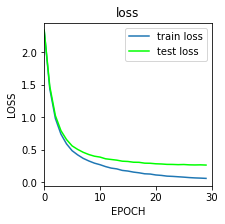

In [12]:
# 損失の可視化
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))

plt.plot(range(EPOCH), train_loss_value)
plt.plot(range(EPOCH), test_loss_value, c='#00ff00')
plt.xlim(0, EPOCH)
# plt.ylim(0, 2.5)
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend(['train loss', 'test loss'])
plt.title('loss')
plt.savefig("loss_image.png")

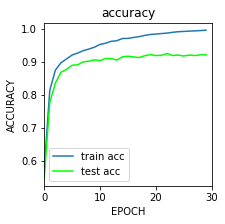

In [13]:
# 正解率の可視化
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))

plt.plot(range(EPOCH), train_acc_value)
plt.plot(range(EPOCH), test_acc_value, c='#00ff00')
plt.xlim(0, EPOCH)
# plt.ylim(0, 1)
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend(['train acc', 'test acc'])
plt.title('accuracy')
plt.savefig("accuracy_image.png")

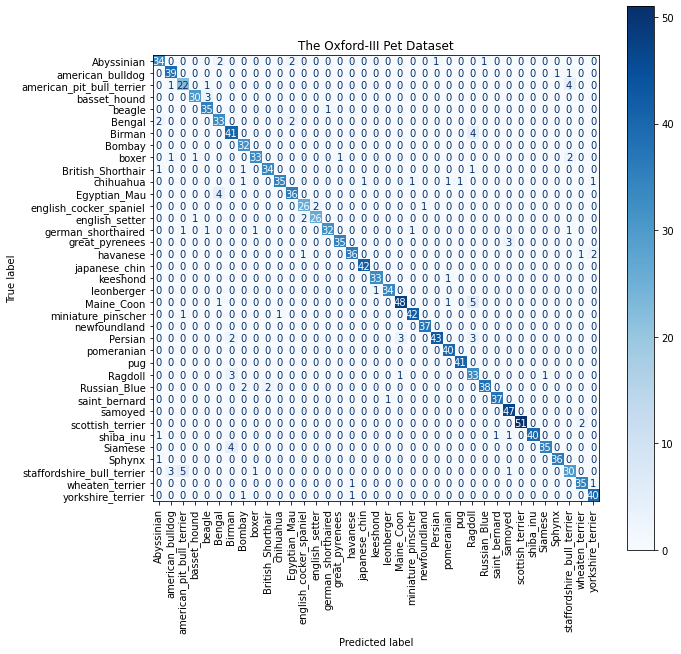

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(cm_true_list, cm_predicted_list)
cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('The Oxford-III Pet Dataset')
cmp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', ax=ax)